(321L, 481L, 3L)


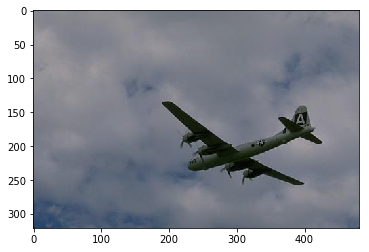

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load image data [airplane.jpg, tiger.jpg]
img = mpimg.imread('datasets/airplane.jpg')

# Show image
plt.imshow(img);
print img.shape

In [2]:
def get_distance_matrix(data, centers):
    """
    Get distance matrix between each point in matrix 'data' and
    each point in matrix 'centers'
    
    Args:
        data: 2D-matrix of shape (N * D) where N is the number of data and D is the dimension of data
        centers: 2D_matrix of shape (K * D) where K is the number of clusters
    Returns:
        distance_mat: computed distance matrix of shape (N * K)
    """
    
    # Define N, D and K using the discription above with np.shape function
    N, D = data.shape
    K = centers.shape[0]
    
    # Initialize distance matrix with zeros
    distance_mat = np.zeros((N, K))
    
    # Update distance matrix
    for k in range(K):
        distance_mat[:, k] = np.sqrt(np.sum((data - centers[k]) ** 2, axis=1))
    
    return distance_mat

def get_new_centers(data, K, cluster_indices):
    """
    Get new centers
    
    Args:
        data: 2D-matrix of shape (N * D) where N is the number of data and D is the dimension of data
        K: the number of clusters
        cluster_indices: a vector of shape (N) that has elements assigned cluster for each data point
    Returns:
        new_centers: new center matrix of shape (K * D)
    """
    
    # Define python list
    new_centers = []
    
    # For each center
    for k in range(K):
        # Find which data point belongs to the cluster k
        cluster_index = cluster_indices == k
        x_k = data[cluster_index]
        
        # Compute the new mean from thoes data
        new_center = np.mean(x_k, axis=0)
        
        # Append the new center to the python list new_centers
        new_centers.append(new_center)
    
    return np.array(new_centers)

In [5]:
# Set arbitrary K
K = 3

# Reshape 3D-matrix data to 2D-matrix
data = np.reshape(img, (-1, 3))

# Initialize centers with K randomly selected data
permu = np.random.permutation(len(data))
centers = data[permu[:K]]

max_iter = 100
for step in range(max_iter):
    # Get pairwise distance of input dat and centers
    distance_mat = get_distance_matrix(data, centers)
    # Determine which data belong to which class
    cluster_indices = np.argmin(distance_mat, axis=1)
    # Get new centers
    centers = get_new_centers(data, K, cluster_indices)

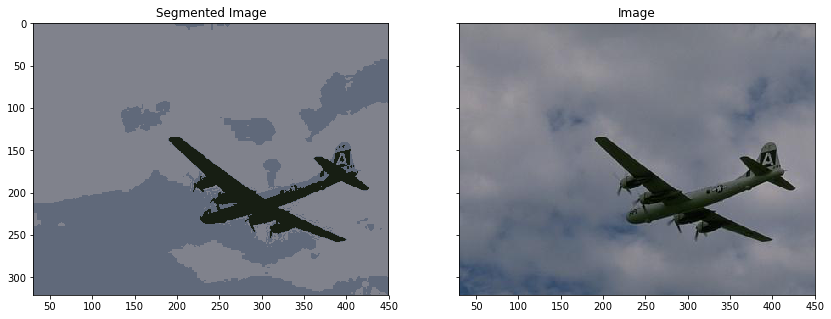

In [6]:
# Make segmented data
segmented_data = np.zeros_like(data)
for k in range(K):
    segmented_data[cluster_indices == k] = centers[k]
segmented_img = np.reshape(segmented_data, img.shape)
    
# Show segmented image and compare it with true image
f, axarr = plt.subplots(1, 2, sharey=True, figsize=(14, 5))
axarr[0].imshow(segmented_img);
axarr[0].set_title('Segmented Image');
axarr[1].imshow(img);
axarr[1].set_title('Image');